<a href="https://colab.research.google.com/github/Nagalakshmi-create/PythonTaskFiles/blob/master/detect_mask_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [ ]:
# !pip install tensorflow        

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import layers

2022-05-03 14:36:31.108404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-03 14:36:31.108463: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
tf.__version__

'2.8.0'

# Image Augmentation

Image augmentation is done for increasing the dataset. If you want the dataset change the below cell from markdown to code and upload the path of your image in load_img.

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/home/neosoft/Downloads/mask_dataset/train/properly_worn_mask/HTB1jE7ILFXXXXaEXpXXq6xXFXXXd.jpg')
x = img_to_array(img)
x=x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='/home/neosoft/Downloads/mask_dataset/train/properly_worn_mask',
                         save_prefix='Augmented_image', save_format='jpg'):
    i += 1
    if i>4:
        break

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
# we use rescale for normalisation. We are diving each value with 255 to get all the between 
# 0 and 1. In normal dataset we can call it like feature scaling.

# shear_range, zoom_range, horizontal_flip these all are for transformations that will perform
# image augmentation on the images of the training set. We can also run this without using these
# transformation but it will raise to overfitting. So we are these transformations.

train_datagen = ImageDataGenerator(rescale = 1./255,  
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# flow_from_directory --> to connect this image augmentation tool to the images of your training set.
# target_size --> our input image size
# batch_size --> size of the batches means how many images we want to have in each batch.
# class_mode --> binary for either 0 or 1, categorical for more than 2 outputs.

training_set = train_datagen.flow_from_directory('/home/neosoft/Downloads/mask_dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1083 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/home/neosoft/Downloads/mask_dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 98 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

2022-05-03 14:36:34.640422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-03 14:36:34.640470: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-03 14:36:34.640503: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neosoft-Latitude-E7270): /proc/driver/nvidia/version does not exist
2022-05-03 14:36:34.641034: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
# epochs --> how many times to read the dataset

cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
 1/34 [..............................] - ETA: 28s - loss: 0.6571 - accuracy: 0.6250

2022-05-03 14:36:35.886367: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15745024 exceeds 10% of free system memory.
2022-05-03 14:36:35.952119: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28096128 exceeds 10% of free system memory.
2022-05-03 14:36:35.994750: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15745024 exceeds 10% of free system memory.
2022-05-03 14:36:36.018817: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 14530320 exceeds 10% of free system memory.


 2/34 [>.............................] - ETA: 7s - loss: 0.8310 - accuracy: 0.5781 

2022-05-03 14:36:36.182594: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15745024 exceeds 10% of free system memory.


34/34 [==============================] - 10s 283ms/step - loss: 0.5392 - accuracy: 0.6962 - val_loss: 0.3190 - val_accuracy: 0.8265
Epoch 2/25
34/34 [==============================] - 9s 271ms/step - loss: 0.3690 - accuracy: 0.8116 - val_loss: 0.1883 - val_accuracy: 0.8980
Epoch 3/25
34/34 [==============================] - 9s 280ms/step - loss: 0.2867 - accuracy: 0.8818 - val_loss: 0.1595 - val_accuracy: 0.9184
Epoch 4/25
34/34 [==============================] - 13s 371ms/step - loss: 0.2530 - accuracy: 0.9003 - val_loss: 0.0647 - val_accuracy: 0.9796
Epoch 5/25
34/34 [==============================] - 10s 296ms/step - loss: 0.2530 - accuracy: 0.8984 - val_loss: 0.1394 - val_accuracy: 0.9388
Epoch 6/25
34/34 [==============================] - 9s 262ms/step - loss: 0.2272 - accuracy: 0.9132 - val_loss: 0.1295 - val_accuracy: 0.9388
Epoch 7/25
34/34 [==============================] - 8s 246ms/step - loss: 0.1977 - accuracy: 0.9280 - val_loss: 0.1455 - val_accuracy: 0.9286
Epoch 8/25
34/

## Part 4 - Making a single prediction

In [ ]:
import cv2
from matplotlib import pyplot as plt

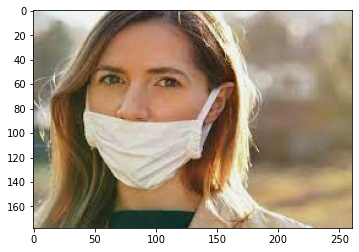

In [ ]:
predict_img = cv2.imread("/home/neosoft/Downloads/mask_dataset/image_2022_04_22T14_11_29_438Z.png")
predict_img = cv2.cvtColor(predict_img, cv2.COLOR_BGR2RGB)
plt.imshow(predict_img)

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/home/neosoft/Downloads/mask_dataset/image_2022_04_22T14_11_29_438Z.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Properly worn mask'
else:
  prediction = 'Improperly worn mask'

In [ ]:
print(prediction)

Improperly worn mask
